# SIDEWALL SUPPLY AIR JET DESIGN
---

In [19]:
import warnings
import numpy as np

from hvac import Quantity
from hvac.fluids import CoolPropWarning
from hvac.air_diffusion import RoomInfo, design_side_wall_supply

from sidewall_supply_plotter import JetPlotter

In [20]:
warnings.filterwarnings('ignore', category=CoolPropWarning)
Q_ = Quantity

## Room Properties

In [21]:
room = RoomInfo(
    L=Q_(23 / 4, 'm'),
    B=Q_(11, 'm'),
    H=Q_(6, 'm'),
    Z=Q_(1.8, 'm'),
    T_r=Q_(26, 'degC'),
    Q_dot=Q_(25.452 / 4, 'kW')
)

## Sidewall Supply Properties

- throw constant *K1* of the supply outlet
- effective width *b<sub>o</sub>* and height *h<sub>o</sub>* of the supply opening
- height between the upper edge of the supply outlet and the ceiling *d*

In [22]:
K1 = 0.5
h_o = Q_(250 * np.sin(120 * (np.pi / 180)), 'mm')
d = Q_(0.5, 'm')

## Running the Design

In [23]:
sws = design_side_wall_supply(
    room, h_o, d, K1, 
    L_th_frac=0.75, 
    Ar_r_crit=11_000,
    v_r_minmax=(Q_(0.1, 'm / s'), Q_(0.5, 'm / s'))
)
print(sws.output)

minimum room air change rate: 7.73 1/h
minimum supply air volume flow rate: 2931.8 m³/h
supply air temperature: 19 °C
supply air/room air temperature difference: -6.6 K
supply air velocity: 23.83 m/s
supply air momentum: 23.4 N
mean room air speed: 0.42 m/s
throw to 0.5 m/s: 4.3 m
effective area of ATD: 0.0342 m²
aspect ratio of ATD: 0.445 dimensionless
effective length of ATD: 123 mm
effective height of ATD: 277 mm
maximum allowable air jet drop: 3.13 m


C:\Users\Tom\PycharmProjects\python-hvac\hvac\air_diffusion\design\side_wall_supply.py:460: RuntimeWarning: the cold jet may not attach to the ceiling with minimum length of ATD = 123 mm
  warnings.warn(


## Plotting the Charts

In [24]:
plotter = JetPlotter(sws, room, L=Q_(23, 'm'))

### Trajectory

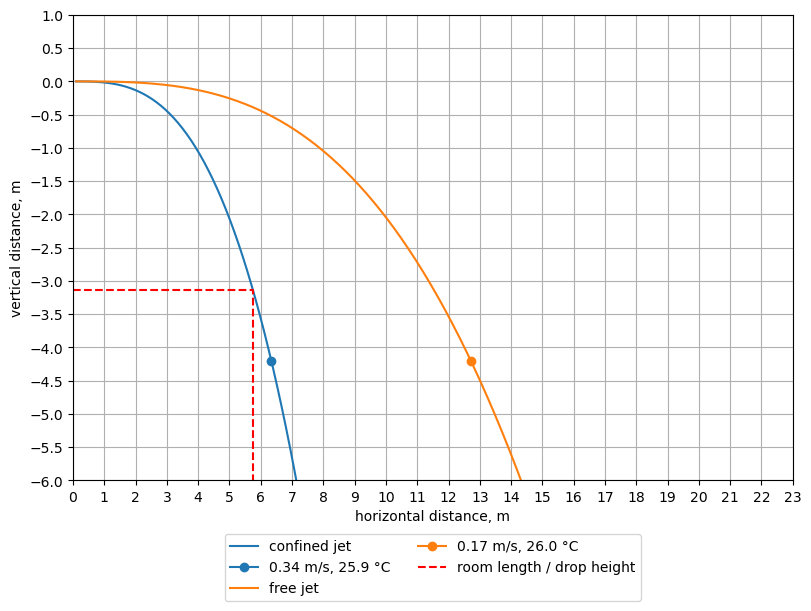

In [25]:
chart = plotter.plot_jet_trajectory()
chart.show()

## Velocity

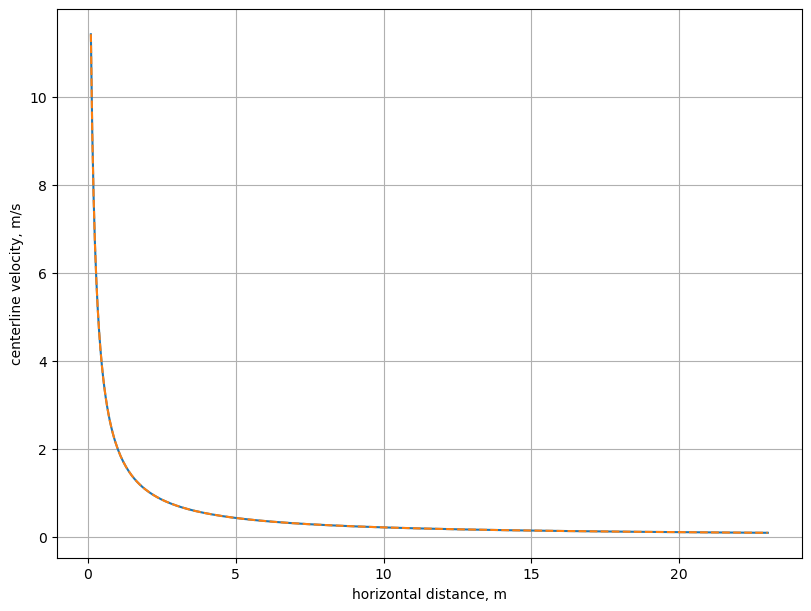

In [26]:
chart = plotter.plot_jet_velocity()
chart.show()

### Temperature

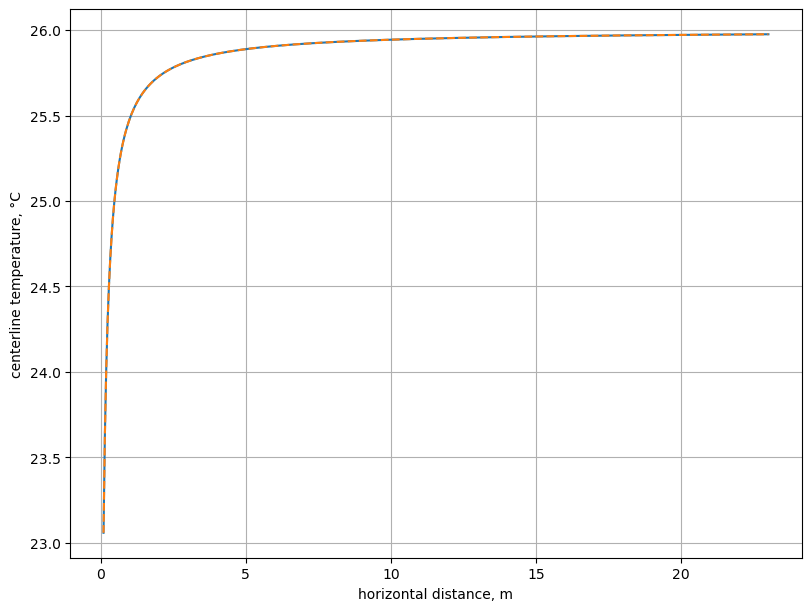

In [27]:
chart = plotter.plot_jet_temperature()
chart.show()